<a href="https://colab.research.google.com/github/oddsmile/GAcustomerprediction/blob/main/4%EB%B2%88%EA%B3%BC%206%EB%B2%88%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

요일/시간대별 사용자 수를 구하고 이를 heatmap으로 시각화

<ipython-input-11-93192a01f64f>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/preproccessed_df.csv', parse_dates=['utc_time'])


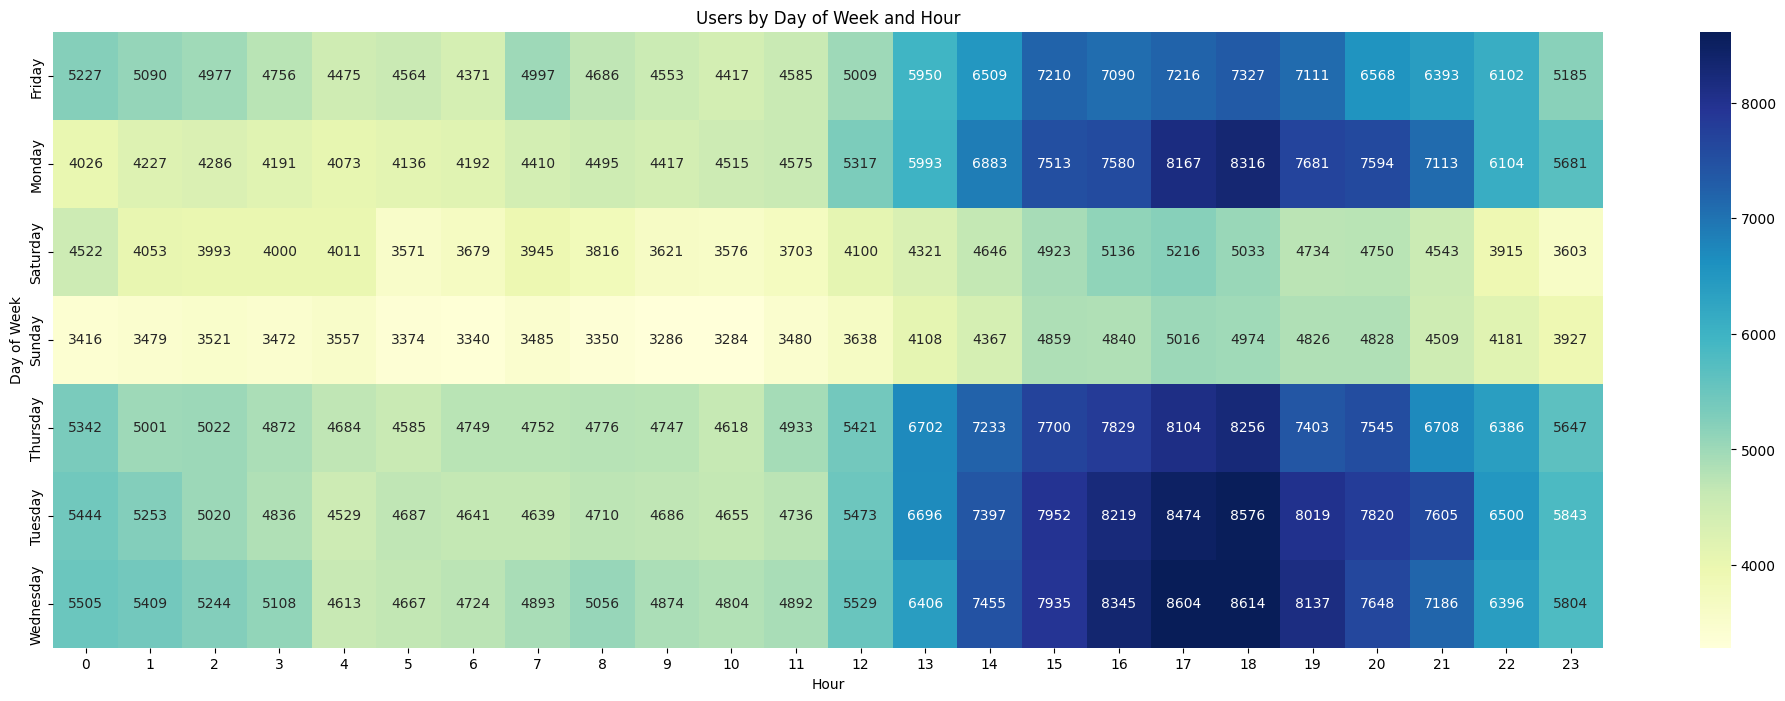

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/preproccessed_df.csv', parse_dates=['utc_time'])

# 요일 및 시간대 추출
df['day_of_week'] = df['utc_time'].dt.day_name()
df['hour'] = df['utc_time'].dt.hour

# 요일/시간대별 사용자 수 계산
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# heatmap으로 시각화
plt.figure(figsize=(25, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Users by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

국가별 DAU 평균을 Folium으로 시각화하기

In [22]:
import pandas as pd
import folium

# 주어진 국가들의 대략적인 중심 위도와 경도
country_coordinates = {
    'United States': (37.0902, -95.7129),
    'India': (20.5937, 78.9629),
    'United Kingdom': (55.3781, -3.4360),
    'Canada': (56.1304, -106.3468),
    'Vietnam': (14.0583, 108.2772),
    'Turkey': (38.9637, 35.2433),
    'Thailand': (15.8700, 100.9925),
    'Germany': (51.1657, 10.4515),
    'Brazil': (-14.2350, -51.9253),
    'Japan': (36.2048, 138.2529)
}

# 데이터 로드
df = pd.read_csv('/content/preproccessed_df.csv')

# 주어진 국가들의 DAU 평균 계산
country_dau_avg = df[df['country'].isin(country_coordinates.keys())].groupby('country')['visits'].mean().reset_index()

# Folium 지도 객체 생성
m = folium.Map(location=[0, 0], zoom_start=2)

# 주어진 국가들의 DAU 평균을 지도에 시각화
for index, row in country_dau_avg.iterrows():
    country = row['country']
    if country in country_coordinates:
        folium.Marker(
            location=country_coordinates[country],
            popup=f"{country}: {row['visits']}",
            icon=folium.Icon(color='blue')
        ).add_to(m)

# 결과 지도 저장
m.save('selected_countries_dau_avg_map.html')

print

<ipython-input-22-5ec8dae91fd6>:19: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/preproccessed_df.csv')


<function print>